In [1]:
import pandas as pd 
credit_df = pd.read_csv('./data/credit_card_default.csv')

C:\Users\neugg\AppData\Roaming\Python\Python37\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\neugg\AppData\Roaming\Python\Python37\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\neugg\AppData\Roaming\Python\Python37\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
credit_df = credit_df.drop(columns=['BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'])

In [3]:
print(credit_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_1      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  PAY_AMT1   30000 non-null  int64
 14  PAY_AMT2   30000 non-null  int64
 15  PAY_AMT3   30000 non-null  int64
 16  PAY_AMT4   30000 non-null  int64
 17  PAY_AMT5   30000 non-null  int64
 18  PAY_AMT6   30000 non-null  int64
 19  DEFAULT    30000 non-null  int64
dtypes: int64(20)
memory usage: 4.6 MB
None


AxesSubplot(0.125,0.125;0.775x0.755)


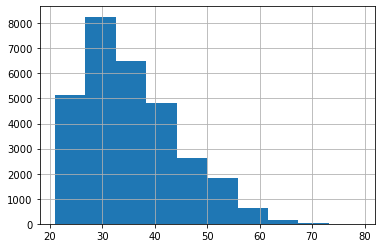

In [4]:
print(credit_df['AGE'].hist())

<AxesSubplot:>

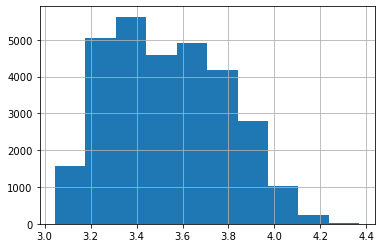

In [3]:
import math
age_df = credit_df['AGE'].apply(lambda x: math.log(x))

age_df.hist()


In [4]:
credit_df['AGE'] = age_df

In [5]:
credit_df = credit_df.drop(columns=['ID'])

<AxesSubplot:>

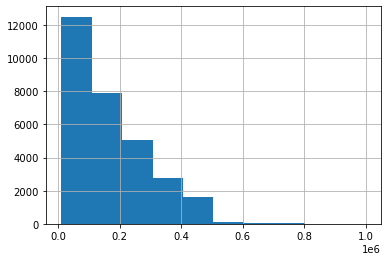

In [8]:
credit_df['LIMIT_BAL'].hist()

<AxesSubplot:>

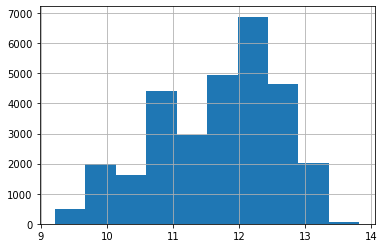

In [6]:
credit_df['LIMIT_BAL'] = credit_df['LIMIT_BAL'].apply(lambda x: math.log(x))
credit_df['LIMIT_BAL'].hist()

0          3913
1          2682
2         29239
3         46990
4          8617
          ...  
29995    188948
29996      1683
29997      3565
29998     -1645
29999     47929
Name: BILL_AMT1, Length: 30000, dtype: int64


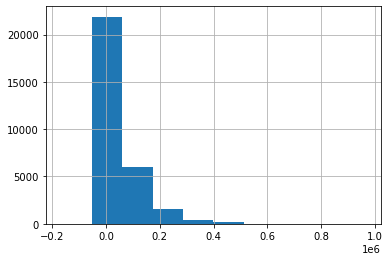

In [7]:
credit_df['BILL_AMT1'].hist()
print(credit_df['BILL_AMT1'])

<AxesSubplot:>

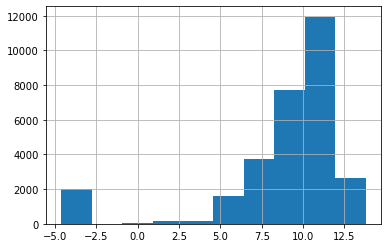

In [7]:
credit_df['BILL_AMT1'] = credit_df['BILL_AMT1']. apply(lambda x: abs(x+.01))
credit_df['BILL_AMT1'] = credit_df['BILL_AMT1']. apply(lambda x: math.log(x))
credit_df['BILL_AMT1'].hist()

In [9]:
print(credit_df.describe())

          LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      11.663002      1.603733      1.853133      1.553667      3.536971   
std        0.941135      0.489129      0.790349      0.518326      0.251541   
min        9.210340      1.000000      0.000000      1.000000      3.044522   
25%       10.819778      1.000000      1.000000      1.000000      3.332205   
50%       11.849398      2.000000      2.000000      2.000000      3.526361   
75%       12.388394      2.000000      2.000000      2.000000      3.713572   
max       13.815511      2.000000      6.000000      3.000000      4.369448   

              PAY_1         PAY_2         PAY_3         PAY_4         PAY_5  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      -0.016700     -0.133767     -0.166200     -0.220667     -0.266200   
std        1.123802      1.197186      1.196868    

In [8]:
X = credit_df[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'PAY_AMT1',
    'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]

In [9]:
y = credit_df['DEFAULT']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=5)

In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
y_pred = model.predict(X_test)

In [89]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y_test, y_pred)
print('Accuracy %.4f' % accuracy_score)

Accuracy 0.7962


In [25]:
from sklearn.metrics import balanced_accuracy_score
accuracy_score = balanced_accuracy_score(y_test, y_pred, sample_weight=None, adjusted=False)
print('Balanced Accuracy %.4f' % accuracy_score)

Balanced Accuracy 0.5861


In [101]:
from sklearn.metrics import average_precision_score
precision_score = average_precision_score(y_test, y_pred, average='macro', pos_label=1, sample_weight=None)
print('Average Precision %.4f' % precision_score)

Average Precision 0.3131


In [26]:
from sklearn.metrics import brier_score_loss
brier_score_loss = brier_score_loss(y_test, y_pred, sample_weight=None, pos_label=1)
print('Brier Score Loss %.4f' % brier_score_loss)

Brier Score Loss 0.2038


In [92]:
from sklearn.metrics import precision_score
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_weighted = precision_score(y_test, y_pred, average='weighted')
precision_none = precision_score(y_test, y_pred, average=None)

print('Precision Micro Score %.4f' % precision_micro)
print('Precision Macro Score %.4f' % precision_macro)
print('Precision Weighted Score %.4f' % precision_weighted)
print('Precision None Score:', precision_none)

Precision Micro Score 0.7962
Precision Macro Score 0.7314
Precision Weighted Score 0.7727
Precision None Score: [0.80668983 0.65606936]


In [94]:
from sklearn.metrics import average_precision_score
precision_score = average_precision_score(y_test, y_pred, average='macro', pos_label=1, sample_weight=None)
print('Average Precision %.4f' % precision_score)

Average Precision 0.3131


In [102]:
from sklearn.metrics import recall_score
recall_micro = recall_score(y_test, y_pred, average='micro')
recall_macro = recall_score(y_test, y_pred, average='macro')
recall_weighted = recall_score(y_test, y_pred, average='weighted')
recall_none = recall_score(y_test, y_pred, average=None)

print('Recall Micro Score %.4f' % recall_micro)
print('Recall Macro Score %.4f' % recall_macro)
print('Recall Weighted Score %.4f' % recall_weighted)
print('Recall None Score:', recall_none)

Recall Micro Score 0.7962
Recall Macro Score 0.5861
Recall Weighted Score 0.7962
Recall None Score: [0.96895382 0.20322292]


In [103]:
from sklearn.metrics import f1_score
f1_micro = f1_score(y_test, y_pred, average='micro')
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')
f1_none = f1_score(y_test, y_pred, average=None)

print('F1 Micro Score %.4f' % f1_micro)
print('F1 Macro Score %.4f' % f1_macro)
print('F1 Weighted Score %.4f' % f1_weighted)
print('F1 None Score:', f1_none)

F1 Micro Score 0.7962
F1 Macro Score 0.5954
F1 Weighted Score 0.7518
F1 None Score: [0.88040773 0.31032126]


In [104]:
from sklearn.metrics import roc_auc_score
roc_auc_micro = roc_auc_score(y_test, y_pred, average='micro')
roc_auc_macro = roc_auc_score(y_test, y_pred, average='macro')
roc_auc_weighted = roc_auc_score(y_test, y_pred, average='weighted')
roc_auc_none = roc_auc_score(y_test, y_pred, average=None)

print('ROC AUC Micro Score %.4f' % roc_auc_micro)
print('ROC AUC Macro Score %.4f' % roc_auc_macro)
print('ROC AUC Weighted Score %.4f' % roc_auc_weighted)
print('ROC AUC None Score:', roc_auc_none)

ROC AUC Micro Score 0.5861
ROC AUC Macro Score 0.5861
ROC AUC Weighted Score 0.5861
ROC AUC None Score: 0.5860883703016331


In [12]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

In [15]:
from sklearn.metrics import roc_auc_score
roc_auc_micro = roc_auc_score(y_test, y_pred_gnb, average='micro')
roc_auc_macro = roc_auc_score(y_test, y_pred_gnb, average='macro')
roc_auc_weighted = roc_auc_score(y_test, y_pred_gnb, average='weighted')
roc_auc_none = roc_auc_score(y_test, y_pred_gnb, average=None)

print('ROC AUC Micro Score %.4f' % roc_auc_micro)
print('ROC AUC Macro Score %.4f' % roc_auc_macro)
print('ROC AUC Weighted Score %.4f' % roc_auc_weighted)
print('ROC AUC None Score:', roc_auc_none)

ROC AUC Micro Score 0.6840
ROC AUC Macro Score 0.6840
ROC AUC Weighted Score 0.6840
ROC AUC None Score: 0.6840333241386527


In [1]:
from pycaret.classification import *

C:\Users\neugg\AppData\Roaming\Python\Python37\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\neugg\AppData\Roaming\Python\Python37\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\neugg\AppData\Roaming\Python\Python37\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [6]:
env_setup = setup(data = credit_df, target = 'DEFAULT', session_id=123)

,Description,Value
0,session_id,123
1,Target,DEFAULT
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(30000, 25)"
5,Missing Values,False
6,Numeric Features,15
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


In [8]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8195,0.0000,0.3571,0.6841,0.4690,0.3730,0.4017,0.0610
gbc,Gradient Boosting Classifier,0.8189,0.7805,0.3594,0.6786,0.4698,0.3728,0.4003,3.3470
lda,Linear Discriminant Analysis,0.8189,0.7671,0.3773,0.6673,0.4819,0.3823,0.4052,0.3190
lightgbm,Light Gradient Boosting Machine,0.8188,0.7794,0.3692,0.6722,0.4763,0.3779,0.4028,0.2240
ada,Ada Boost Classifier,0.8174,0.7744,0.3436,0.6814,0.4565,0.3608,0.3916,0.8490
rf,Random Forest Classifier,0.8157,0.7638,0.3735,0.6528,0.4750,0.3731,0.3946,1.4700
et,Extra Trees Classifier,0.8053,0.7383,0.3703,0.6047,0.4591,0.3487,0.3644,1.5800
lr,Logistic Regression,0.7766,0.6428,0.0000,0.0000,0.0000,-0.0003,-0.0028,0.5970
knn,K Neighbors Classifier,0.7514,0.6024,0.1792,0.3801,0.2433,0.1171,0.1290,0.6520
dt,Decision Tree Classifier,0.7264,0.6201,0.4266,0.3955,0.4102,0.2325,0.2329,0.3050


In [9]:
print(best_model)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)


In [10]:
exp_clf102 = setup(data = credit_df, target = 'DEFAULT', session_id=123,
                  normalize = True, 
                  transformation = True, 
                  ignore_low_variance = True,
                  fix_imbalance=True,
                  remove_multicollinearity = True, multicollinearity_threshold = 0.95,
                  bin_numeric_features = ['LIMIT_BAL', 'AGE'],
                  group_features = [['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'],
                                   ['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']],
                  log_experiment = True, experiment_name = 'credit1')

,Description,Value
0,session_id,123
1,Target,DEFAULT
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(30000, 25)"
5,Missing Values,False
6,Numeric Features,15
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


In [11]:
top3 = compare_models(n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8183,0.7784,0.3991,0.6526,0.4951,0.3921,0.4099,0.8840
gbc,Gradient Boosting Classifier,0.8157,0.7777,0.3983,0.6406,0.4911,0.3860,0.4023,7.5590
rf,Random Forest Classifier,0.8139,0.7642,0.3989,0.6321,0.4889,0.3822,0.3975,2.7260
et,Extra Trees Classifier,0.8111,0.7531,0.3970,0.6212,0.4841,0.3753,0.3896,3.8820
ada,Ada Boost Classifier,0.8109,0.7616,0.4215,0.6111,0.4989,0.3871,0.3973,2.2370
qda,Quadratic Discriminant Analysis,0.7865,0.7270,0.1005,0.6400,0.1734,0.1202,0.1903,0.9750
ridge,Ridge Classifier,0.7685,0.0000,0.5975,0.4854,0.5355,0.3836,0.3873,0.3450
lda,Linear Discriminant Analysis,0.7680,0.7747,0.5981,0.4846,0.5353,0.3830,0.3869,1.0830
lr,Logistic Regression,0.7381,0.7012,0.4859,0.4244,0.4529,0.2818,0.2830,0.7020
dt,Decision Tree Classifier,0.7286,0.6215,0.4241,0.3982,0.4106,0.2345,0.2348,0.6720


In [12]:
print(top3)

[LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                        

In [13]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [14]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7229,0.6824,0.4509,0.3937,0.4203,0.2393,0.2403
1,0.7295,0.7003,0.4819,0.4102,0.4431,0.2660,0.2675
2,0.7424,0.6857,0.4776,0.4308,0.4530,0.2851,0.2857
3,0.7438,0.7076,0.5203,0.4381,0.4756,0.3078,0.3098
4,0.7362,0.7083,0.4840,0.4212,0.4504,0.2779,0.2791
5,0.7543,0.7329,0.5352,0.4572,0.4931,0.3323,0.3341
6,0.7395,0.7038,0.5053,0.4293,0.4643,0.2937,0.2954
7,0.7271,0.6816,0.4776,0.4058,0.4388,0.2601,0.2616
8,0.7386,0.7051,0.4819,0.4248,0.4515,0.2808,0.2818
9,0.7465,0.7046,0.4444,0.4333,0.4388,0.2752,0.2752


In [15]:
print(lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [16]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7229,0.6824,0.4509,0.3937,0.4203,0.2393,0.2403
1,0.7295,0.7003,0.4819,0.4102,0.4431,0.2660,0.2675
2,0.7424,0.6857,0.4776,0.4308,0.4530,0.2851,0.2857
3,0.7438,0.7076,0.5203,0.4381,0.4756,0.3078,0.3098
4,0.7367,0.7083,0.4861,0.4222,0.4519,0.2798,0.2810
5,0.7543,0.7329,0.5352,0.4572,0.4931,0.3323,0.3341
6,0.7395,0.7038,0.5053,0.4293,0.4643,0.2937,0.2954
7,0.7271,0.6816,0.4776,0.4058,0.4388,0.2601,0.2616
8,0.7386,0.7051,0.4819,0.4248,0.4515,0.2808,0.2818
9,0.7465,0.7046,0.4444,0.4333,0.4388,0.2752,0.2752


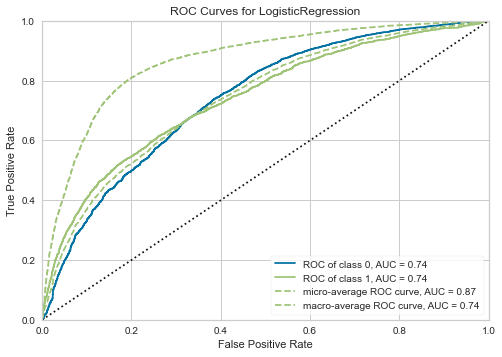

In [21]:
plot_model(tuned_lr, plot='auc')

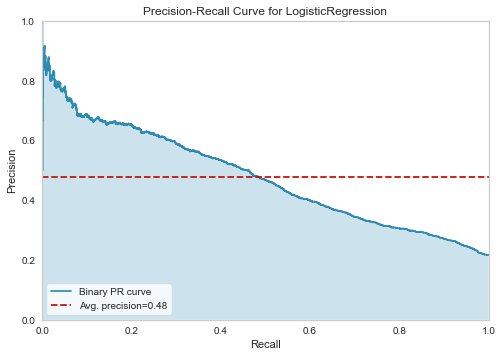

In [22]:
plot_model(tuned_lr, plot = 'pr')

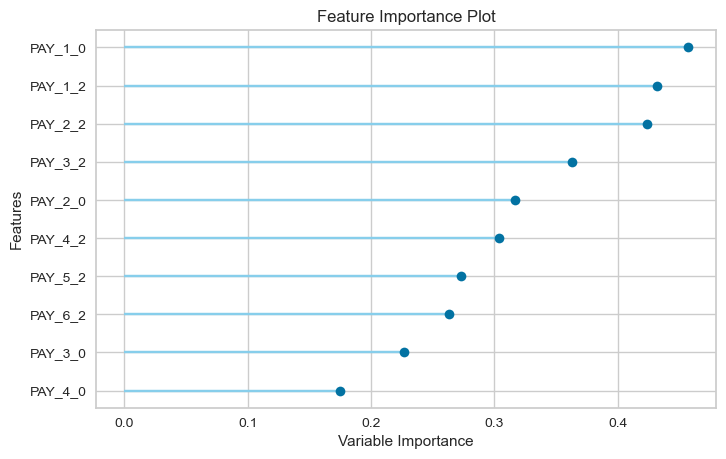

In [23]:
plot_model(tuned_lr, plot='feature')

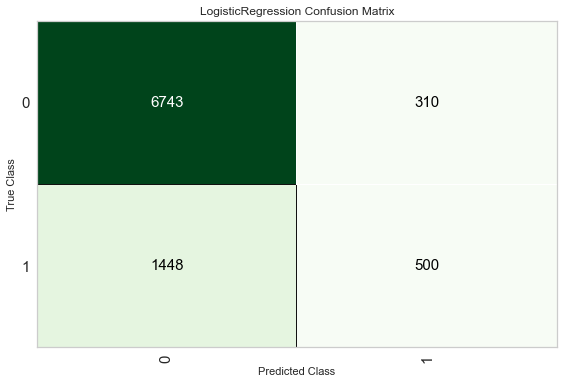

In [24]:
plot_model(tuned_lr, plot = 'confusion_matrix')

In [17]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [18]:
predict_model(tuned_lr)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7330,0.6957,0.4790,0.4020,0.4371,0.2639,0.2656


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,...,AGE_3.0,AGE_4.0,AGE_5.0,AGE_6.0,AGE_7.0,AGE_8.0,AGE_9.0,DEFAULT,Label,Score
0,0.024935,-0.089170,-0.476655,-1.137550,0.708514,-0.189658,-0.585101,-0.697525,-1.147671,2.060550,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.5525
1,0.981395,0.944687,0.698614,0.773870,0.840122,0.614475,0.177519,-0.210579,-0.116423,-0.182004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.5331
2,1.558831,1.595922,1.644410,1.670834,1.745521,1.935973,1.048347,1.014877,-1.147671,1.828626,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,0.8737
3,-0.156774,-1.107243,-1.115093,-1.137550,-1.113716,-0.889781,-0.858036,-1.218815,-1.147671,-1.100909,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0.5241
4,-0.770606,-0.751282,-0.675744,-0.629161,-0.565292,-0.509133,-0.660838,-0.626227,-0.950665,-0.880437,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.5123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8996,-0.921357,-1.008011,-1.009733,-1.020100,-0.958372,-0.855864,-0.005842,-0.229111,-0.108747,0.217023,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.6315
8997,-0.873519,-0.792563,-0.716805,-0.647686,-0.529041,-0.502201,-0.592586,-0.564436,-0.585801,-0.215266,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.5006
8998,-1.163180,-1.028575,-0.929781,-0.979495,-1.113716,-0.889781,-0.162488,0.339006,0.168424,-1.100909,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0.5235
8999,-0.010367,0.095644,0.126439,0.223396,0.248532,0.140181,-0.075137,-0.358624,-0.584261,-0.481699,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.5280


In [19]:
final_lr = finalize_model(tuned_lr)

In [20]:
print(final_lr)

LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [30]:
save_model(final_lr,'Final LR Model 20Mar2021')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='DEFAULT',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  LogisticRegression(C=7.689, class_weight={}, dual=False,
                 

In [2]:
final_lr = load_model('Final LR Model 20Mar2021')

Transformation Pipeline and Model Successfully Loaded


In [21]:
!mlflow ui

^C


## Build a Neural Network

In [30]:
print(y.shape)

(30000,)


In [25]:
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Dropout
from keras.models import Model

neural_net = Sequential()

neural_net.add(Dense(X.shape[1], input_dim=X.shape[1], activation='relu'))
neural_net.add(Dense(1, activation='sigmoid'))

neural_net.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
history = neural_net.fit(X_train, y_train, batch_size=8, epochs=50, verbose=6, validation_split=0.2)

Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50


In [43]:
import numpy as np
new_y_pred_test = np.copy(y_pred_test)
new_y_pred_test = np.round(new_y_pred_test, 0)

new_y_pred_train = np.copy(y_pred_train)
new_y_pred_train = np.round(new_y_pred_train, 0)

In [44]:
from sklearn.metrics import accuracy_score
y_pred_train = neural_net.predict(X_train)
y_pred_train = np.round(y_pred_train, 0)
y_pred_test = neural_net.predict(X_test)
y_pred_test = np.round(y_pred_test, 0)
train_accuracy = accuracy_score(y_true=y_train, y_pred=y_pred_train)
test_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred_test)
print("Train Accuracy: {:0.3f} \nTest Accuracy: {:0.3f}".format(train_accuracy/1e6, test_accuracy/1e6))

Train Accuracy: 0.000 
Test Accuracy: 0.000
